## - Analisis sobre un extracto en .csv de datos del Titanic

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

titanic = pd.read_csv('titanic.csv')

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 1) ¿Cuanto era el costo de los tickets?

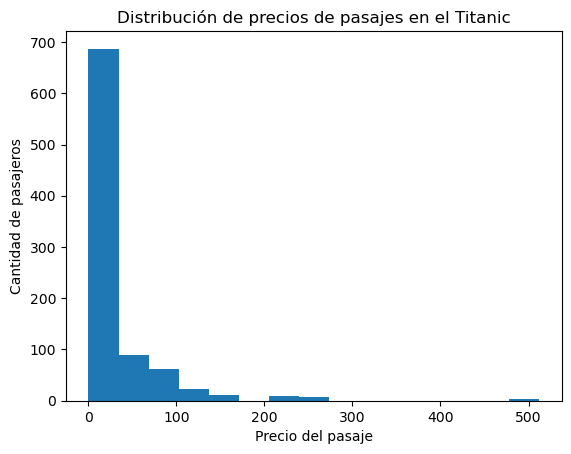

In [4]:
plt.hist(titanic['Fare'], bins=15)
plt.xlabel('Precio del pasaje')
plt.ylabel('Cantidad de pasajeros')
plt.title('Distribución de precios de pasajes en el Titanic')
plt.show()

## Mismo histograma pero ahora separando por clases

<function matplotlib.pyplot.show(close=None, block=None)>

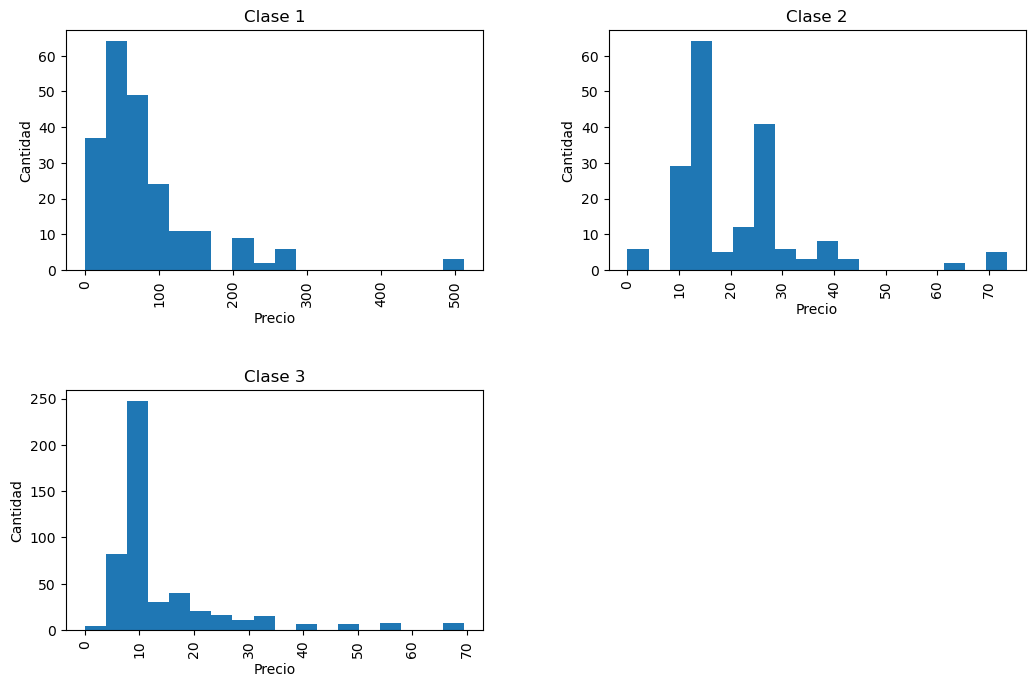

In [5]:
axes = titanic.hist(column='Fare', by='Pclass', bins=18, figsize= (12, 8))

ejes = axes.flatten()
ejes[0].set_title('Clase 1')
ejes[0].set_xlabel('Precio')
ejes[0].set_ylabel('Cantidad')

ejes[1].set_title('Clase 2')
ejes[1].set_xlabel('Precio')
ejes[1].set_ylabel('Cantidad')

ejes[2].set_title('Clase 3')
ejes[2].set_xlabel('Precio')
ejes[2].set_ylabel('Cantidad')


plt.show

## Si quisiera marcar en promedio cuanto salía un pasaje en cada clase?

<function matplotlib.pyplot.show(close=None, block=None)>

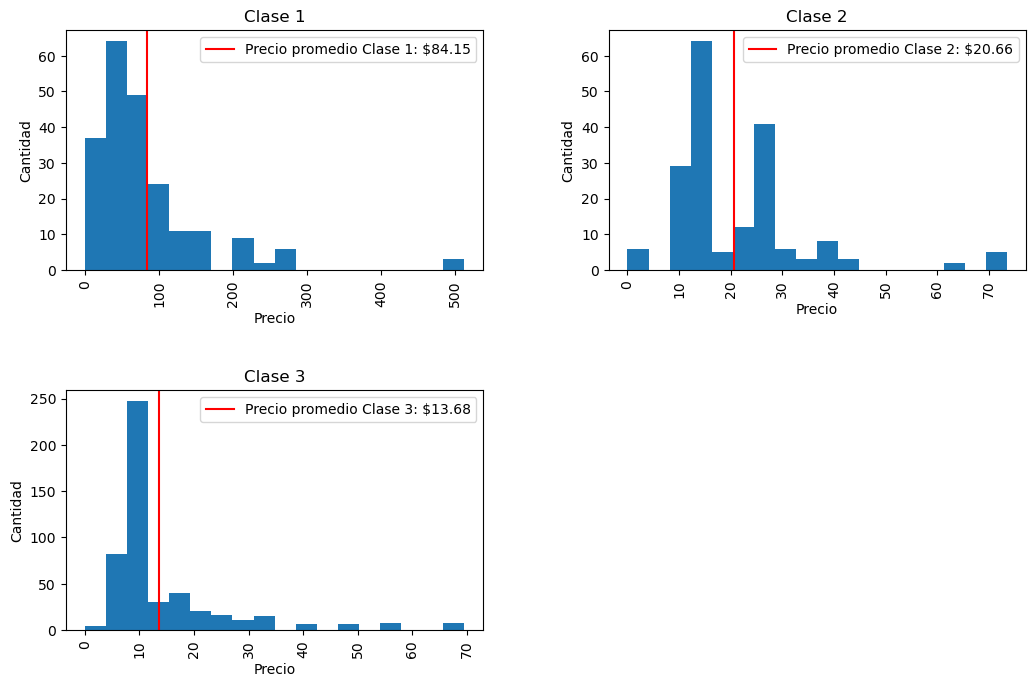

In [ ]:
media_por_clase = titanic.groupby('Pclass')['Fare'].mean()
media_clase_1 = media_por_clase.loc[1]
media_clase_2 = media_por_clase.loc[2]
media_clase_3 = media_por_clase.loc[3]

axes = titanic.hist(column='Fare', by='Pclass', bins=18, figsize= (12, 8))

ejes = axes.flatten()
ejes[0].set_title('Clase 1')
ejes[0].set_xlabel('Precio')
ejes[0].set_ylabel('Cantidad')
ejes[0].axvline(media_clase_1, color='red', label='Precio promedio Clase 1: ${:.2f}'.format(media_clase_1))
ejes[0].legend()

ejes[1].set_title('Clase 2')
ejes[1].set_xlabel('Precio')
ejes[1].set_ylabel('Cantidad')
ejes[1].axvline(media_clase_2, color='red', label='Precio promedio Clase 2: ${:.2f}'.format(media_clase_2))
ejes[1].legend()


ejes[2].set_title('Clase 3')
ejes[2].set_xlabel('Precio')
ejes[2].set_ylabel('Cantidad')
ejes[2].axvline(media_clase_3, color='red', label='Precio promedio Clase 3: ${:.2f}'.format(media_clase_3))
ejes[2].legend()


plt.show

## Agregar una segunda variable categórica para analizar la media de cada pasaje según ciudad de embraque (Embarked)


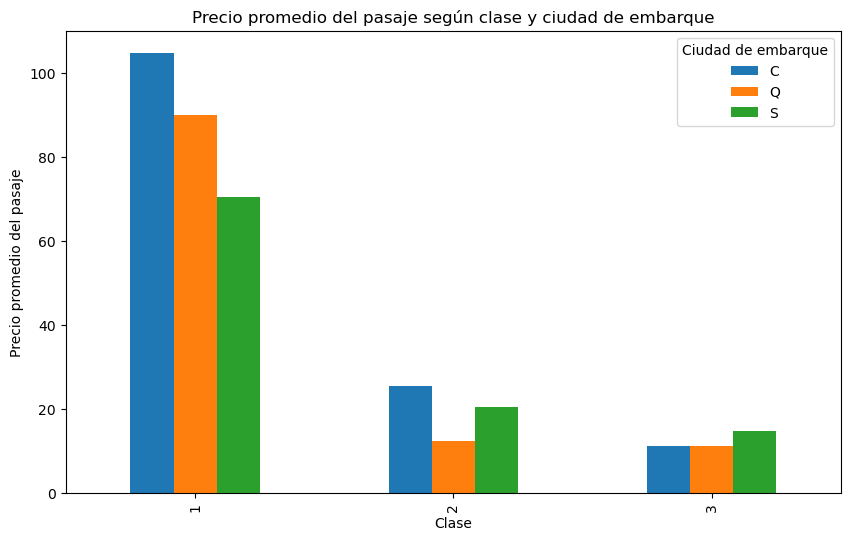

In [12]:

media_por_clase_y_embarque = titanic.groupby(['Pclass', 'Embarked'])['Fare'].mean().unstack()
media_por_clase_y_embarque.plot(kind='bar', figsize=(10,6))
plt.xlabel('Clase')
plt.ylabel('Precio promedio del pasaje')
plt.title('Precio promedio del pasaje según clase y ciudad de embarque')
plt.legend(title='Ciudad de embarque')
plt.show()



## 7) Generar dos nuevas columnas: 'Who' y 'Clasification', de forma tal que:

       ##'Clasification' diga si se conoce la edad o no (o sea, si es un NaN o un número)

In [15]:
titanic['Clasification'] = "conocidos"
titanic.loc[titanic['Age'].isnull(), 'Clasification'] = "desconocidos"

titanic[['Age', 'Clasification']]

,Age,Clasification
0,22.0,conocidos
1,38.0,conocidos
2,26.0,conocidos
3,35.0,conocidos
4,35.0,conocidos
...,...,...
886,27.0,conocidos
887,19.0,conocidos
888,NaN,desconocidos
889,26.0,conocidos


    ## 'Who' debe decir si es un niño, hombre o mujer en base a la edad (<18 es niño sin importar sexo) y sexo (>18 y "male"/"female es hombre/mujer)

In [19]:
titanic['Clasification'] = "conocidos"
titanic['Who']= "NaN"
titanic.loc[titanic['Age'].isnull(), 'Clasification'] = "desconocidos"
titanic.loc[titanic['Age'] <18, 'Who'] = 'niño'
titanic.loc[(titanic['Age'] >18) & (titanic['Sex'] == 'male'), 'Who'] = 'hombre'
titanic.loc[(titanic['Age'] >18) & (titanic['Sex'] == 'female'), 'Who'] = 'mujer'


titanic[['Age', 'Clasification', 'Who']]

,Age,Clasification,Who
0,22.0,conocidos,hombre
1,38.0,conocidos,mujer
2,26.0,conocidos,mujer
3,35.0,conocidos,mujer
4,35.0,conocidos,hombre
...,...,...,...
886,27.0,conocidos,hombre
887,19.0,conocidos,mujer
888,NaN,desconocidos,NaN
889,26.0,conocidos,hombre


Sobrevivieron 342 personas


Text(0.5, 0, '')

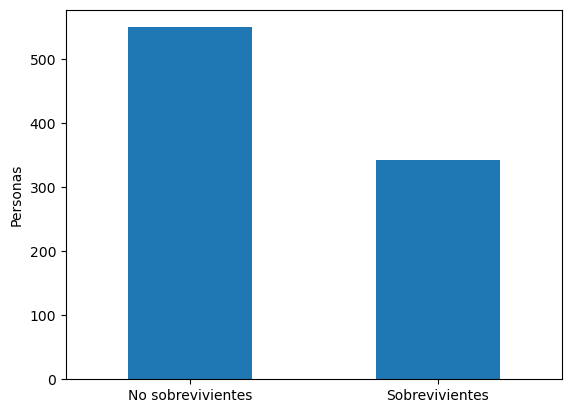

In [21]:
sobrevivientes = titanic['Survived'].sum()
print(f'Sobrevivieron', sobrevivientes, 'personas')

df_sobrevivientes = titanic.groupby('Survived').count()
ax = titanic.groupby('Survived').count()['PassengerId'].plot.bar()

ax.set_xticklabels(['No sobrevivientes','Sobrevivientes'], rotation = 0)
ax.set_ylabel('Personas')
ax.set_xlabel('')

C:\Users\MATIAS\AppData\Local\Temp\ipykernel_7484\2702950359.py:15: RuntimeWarning: invalid value encountered in scalar divide
  porcentaje_sup_ninios = sup_ninios / total_ninios * 100


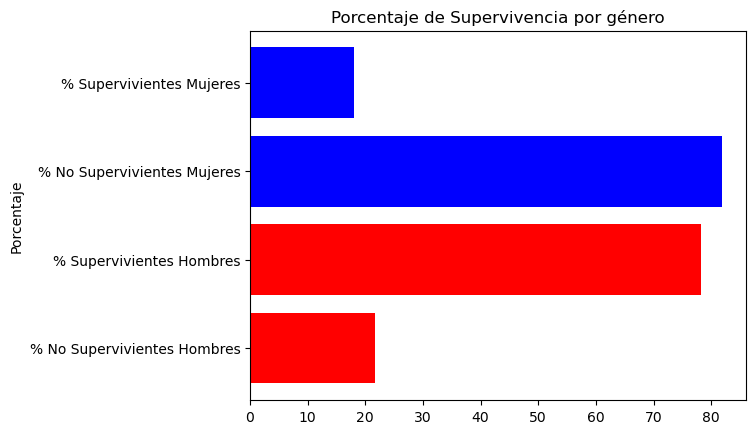

In [ ]:
sup_mujeres = len(titanic[(titanic['Who'] == 'hombre') & (titanic['Survived'] == 1)])
sup_hombres = len(titanic[(titanic['Who'] == 'mujer') & (titanic['Survived'] == 1)])

total_mujeres = titanic[titanic['Who'] == 'hombre']['Survived'].count()
total_hombres = titanic[titanic['Who'] == 'mujer']['Survived'].count()

porcentaje_sup_mujeres = sup_mujeres / total_mujeres * 100
porcentaje_no_sup_mujeres = 100 - porcentaje_sup_mujeres

porcentaje_sup_hombres = sup_hombres / total_hombres * 100
porcentaje_no_sup_hombres = 100 - porcentaje_sup_hombres

plt.barh(['% No Supervivientes Hombres', '% Supervivientes Hombres', '% No Supervivientes Mujeres', '% Supervivientes Mujeres'],
        [porcentaje_no_sup_hombres, porcentaje_sup_hombres, porcentaje_no_sup_mujeres, porcentaje_sup_mujeres,], color = ['r','r','b','b',])
plt.title('Porcentaje de Supervivencia por género')
plt.ylabel('Porcentaje')
plt.show()

## Distribución de Pasajeros por Clase



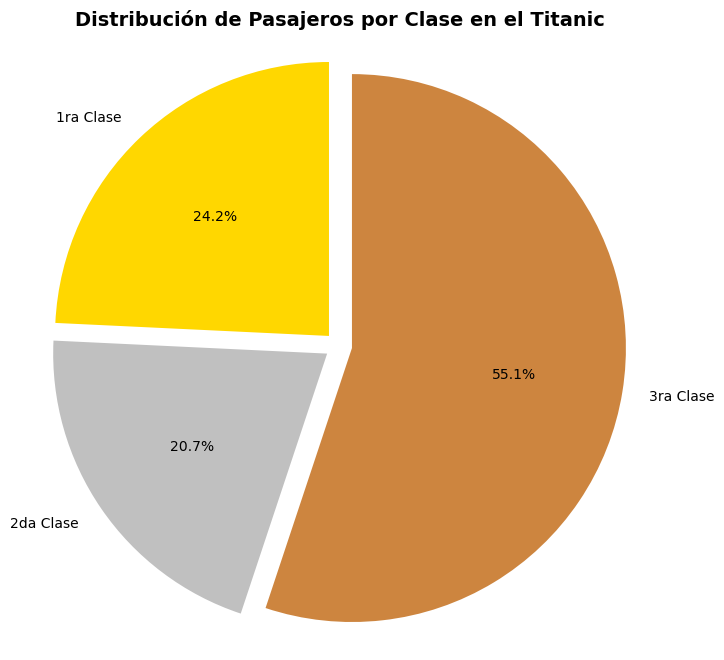

In [ ]:
# Gráfico de torta para distribución por clase
plt.figure(figsize=(8, 8))

# Contamos los pasajeros por clase
clase_counts = titanic['Pclass'].value_counts().sort_index()
labels = ['1ra Clase', '2da Clase', '3ra Clase']
colores = ['gold', 'silver', '#CD853F']  

plt.pie(clase_counts.values, labels=labels, colors=colores, autopct='%1.1f%%', 
        startangle=90, explode=(0.05, 0.05, 0.05))

plt.title('Distribución de Pasajeros por Clase en el Titanic', fontsize=14, fontweight='bold')
plt.axis('equal') ## Equal para hacer el grafico circular
plt.show()

## Supervivencia promedio por grupos de edad



C:\Users\MATIAS\AppData\Local\Temp\ipykernel_7484\2545532157.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  supervivencia_por_edad = titanic.groupby('AgeGroup')['Survived'].mean()


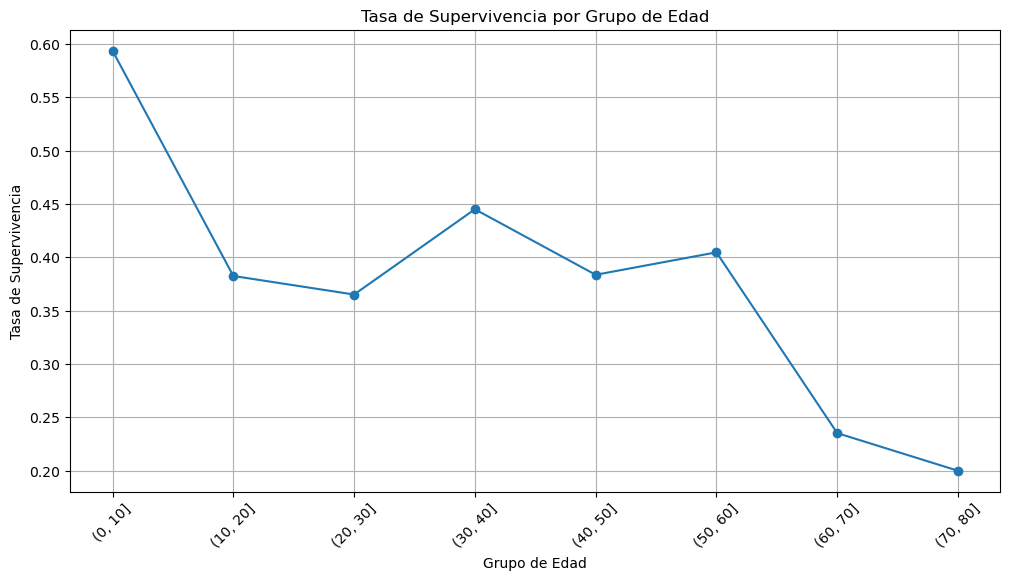

In [39]:
plt.figure(figsize=(12, 6))

edad_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=edad_bins)
supervivencia_por_edad = titanic.groupby('AgeGroup')['Survived'].mean()

plt.plot(supervivencia_por_edad.index.astype(str), supervivencia_por_edad.values, marker='o')
plt.xlabel('Grupo de Edad')
plt.ylabel('Tasa de Supervivencia')
plt.title('Tasa de Supervivencia por Grupo de Edad')
plt.xticks(rotation=45)
plt.grid()
plt.show()


## 8. Gráfico de Subplots: Análisis Completo

Combinemos varios análisis en una sola figura para tener una visión integral:

C:\Users\MATIAS\AppData\Local\Temp\ipykernel_7484\1072041233.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax4.boxplot(class_data, labels=class_labels)


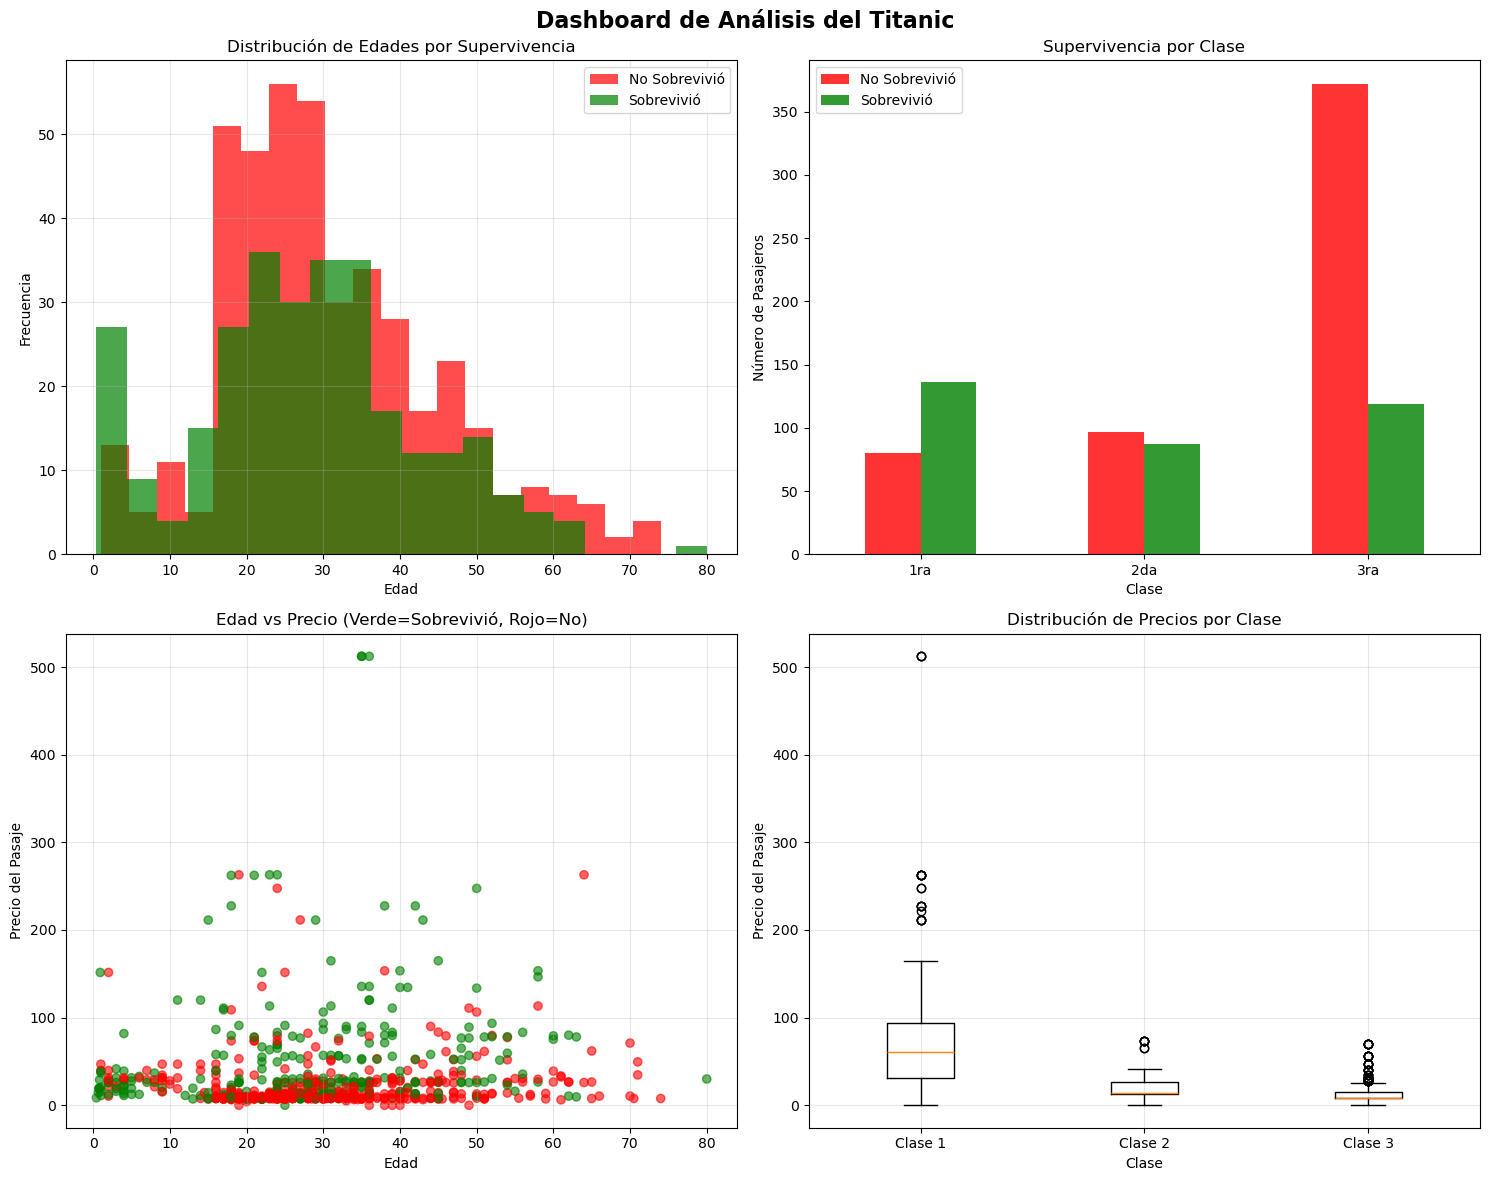

In [ ]:
# Dashboard
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1  Histograma de edades por supervivencia
for survived in [0, 1]:
    data = titanic[titanic['Survived'] == survived]['Age'].dropna()
    label = 'No Sobrevivió' if survived == 0 else 'Sobrevivió'
    color = 'red' if survived == 0 else 'green'
    ax1.hist(data, alpha=0.7, bins=20, label=label, color=color)

ax1.set_xlabel('Edad')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Distribución de Edades por Supervivencia')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2 Barras de supervivencia por clase
class_survival = titanic.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
class_survival.plot(kind='bar', ax=ax2, color=['red', 'green'], alpha=0.8)
ax2.set_xlabel('Clase')
ax2.set_ylabel('Número de Pasajeros')
ax2.set_title('Supervivencia por Clase')
ax2.legend(['No Sobrevivió', 'Sobrevivió'])
ax2.set_xticklabels(['1ra', '2da', '3ra'], rotation=0)

# 3 Dispersión: Edad vs Precio coloreado por supervivencia
colors = titanic['Survived'].map({0: 'red', 1: 'green'})
ax3.scatter(titanic['Age'], titanic['Fare'], c=colors, alpha=0.6)
ax3.set_xlabel('Edad')
ax3.set_ylabel('Precio del Pasaje')
ax3.set_title('Edad vs Precio (Verde=Sobrevivió, Rojo=No)')
ax3.grid(True, alpha=0.3)

# 4 Boxplot de precios por clase
class_data = []
class_labels = []
for pclass in [1, 2, 3]:
    fare_data = titanic[titanic['Pclass'] == pclass]['Fare'].dropna()
    class_data.append(fare_data)
    class_labels.append(f'Clase {pclass}')

ax4.boxplot(class_data, labels=class_labels)
ax4.set_xlabel('Clase')
ax4.set_ylabel('Precio del Pasaje')
ax4.set_title('Distribución de Precios por Clase')
ax4.grid(True, alpha=0.3)

plt.suptitle('Dashboard de Análisis del Titanic', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()